# Maestr√≠a en Inteligencia Artificial Aplicada

## Curso: Operaciones de aprendizaje autom√°tico (TC5044.10)

### Fase 1 | Avance de Proyecto

---

**Institution:** Tecnol√≥gico de Monterrey

**Instructores:** Dr. Gerardo Rodr√≠guez Hern√°ndez, Mtro. Ricardo Valdez Hern√°ndez, Mtra. Mar√≠a Mylen Trevi√±o Elizondo & Dr. Jos√© Carlos Soto Monterrybio

**Autores (Equipo 34):** 

|  FULL NAME                      |     STUDENT ID    | 
| :--------------------------:    |:-----------------:|
| Emilio Contreras T√©llez         |  A01111353        | 
| Claudio Luis Del Valle Azuara   |  A01795773        | 
| Alejandro D√≠az Villag√≥mez       |  A01276769        | 
| Guillermo Herrera Acosta        |  A01400835        | 
| Ivan Troy Santaella Martinez    |  A01120515        | 

**Fecha de entrega:** 12 de octubre del 2025

# 1) SETUP AND CONFIGURATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
import subprocess
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, confusion_matrix, 
    roc_curve, classification_report, make_scorer
)
import joblib
import json

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Create directory structure
Path('data').mkdir(exist_ok=True)
Path('outputs/figures').mkdir(parents=True, exist_ok=True)
Path('outputs/transformers').mkdir(parents=True, exist_ok=True)

print("‚úì Environment setup complete")

‚úì Environment setup complete


# 2) DATA ACQUISITION AND INITIAL INSPECTION

In [2]:
# Load dataset
df_raw = pd.read_csv('data/german_credit_modified.csv')

print(f"Shape: {df_raw.shape[0]} rows √ó {df_raw.shape[1]} columns")
print(f"\nData types:\n{df_raw.dtypes.value_counts()}")
print(f"\nFirst 3 rows:")
display(df_raw.head(3))

Shape: 1020 rows √ó 22 columns

Data types:
object    22
Name: count, dtype: int64

First 3 rows:


laufkont laufzeit moral verw   hoehe sparkont beszeit rate famges buerge  \
0      1.0     18.0   4.0  2.0  1049.0      1.0     2.0  4.0    2.0    1.0   
1      1.0      9.0   4.0  0.0  2799.0      1.0     3.0  2.0    3.0    1.0   
2      2.0    12.0    2.0  9.0   841.0      2.0     4.0  2.0    2.0    1.0   

   ... alter weitkred wohn bishkred beruf pers telef gastarb kredit  \
0  ...  21.0      3.0  1.0      1.0   3.0  2.0   1.0     2.0    1.0   
1  ...  36.0      3.0  1.0      2.0   3.0  1.0   1.0     2.0    1.0   
2  ...  23.0      3.0  1.0      1.0   2.0  2.0   1.0     2.0    1.0   

  mixed_type_col  
0            bad  
1            NaN  
2        unknown  

[3 rows x 22 columns]

# 3) DATA CLEANING

## 3.1) Column Translation (German ‚Üí English)

In [3]:
column_mapping = {
    'laufkont': 'checking_account', 'laufzeit': 'duration',
    'moral': 'credit_history', 'verw': 'purpose', 'hoehe': 'amount',
    'sparkont': 'savings_account', 'beszeit': 'employment_duration',
    'rate': 'installment_rate', 'famges': 'personal_status',
    'buerge': 'other_debtors', 'wohnzeit': 'residence_duration',
    'verm': 'property', 'alter': 'age',
    'weitkred': 'other_installment_plans', 'wohn': 'housing',
    'bishkred': 'existing_credits', 'beruf': 'job',
    'pers': 'dependents', 'telef': 'telephone',
    'gastarb': 'foreign_worker', 'kredit': 'credit_risk'
}

df = df_raw.rename(columns=column_mapping)
print("\n[3.1] ‚úì Column names translated to English")
print(f"\nFirst 3 rows:")
display(df.head(3))


[3.1] ‚úì Column names translated to English

First 3 rows:


checking_account duration credit_history purpose  amount savings_account  \
0              1.0     18.0            4.0     2.0  1049.0             1.0   
1              1.0      9.0            4.0     0.0  2799.0             1.0   
2              2.0    12.0             2.0     9.0   841.0             2.0   

  employment_duration installment_rate personal_status other_debtors  ...  \
0                 2.0              4.0             2.0           1.0  ...   
1                 3.0              2.0             3.0           1.0  ...   
2                 4.0              2.0             2.0           1.0  ...   

    age other_installment_plans housing existing_credits  job dependents  \
0  21.0                     3.0     1.0              1.0  3.0        2.0   
1  36.0                     3.0     1.0              2.0  3.0        1.0   
2  23.0                     3.0     1.0              1.0  2.0        2.0   

  telephone foreign_worker credit_risk mixed_type_col  
0       1.0            2.0         1.0            bad  
1       1.0            2.0         1.0            NaN  
2       1.0            2.0         1.0        unknown  

[3 rows x 22 columns]

## 3.2) ata Quality Issues - Whitespace Cleaning

In [4]:
print("\n[3.2] Cleaning whitespace from all columns\n")

# Remove problematic column first
if 'mixed_type_col' in df.columns:
    df = df.drop(columns=['mixed_type_col'])
    print("  ‚úì Dropped 'mixed_type_col'")

# CRITICAL: Strip whitespace from ALL columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.strip()

print("  ‚úì Whitespace removed from all columns")


[3.2] Cleaning whitespace from all columns

  ‚úì Dropped 'mixed_type_col'
  ‚úì Whitespace removed from all columns


## 3.3) Type Conversion to Numeric

In [5]:
print("\n[3.3] Converting columns to numeric types\n")

# Convert all columns except target to numeric
numeric_cols = [col for col in df.columns if col != 'credit_risk']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(f"  ‚úì Converted {len(numeric_cols)} columns to numeric")


[3.3] Converting columns to numeric types

  ‚úì Converted 20 columns to numeric


## 3.4) Missing Values Analysis and Treatment

In [6]:
print("\n[3.4] Missing Values Analysis and Treatment")

missing = df.isnull().sum()
if missing.sum() > 0:
    print(f"\nMissing values detected:")
    missing_df = pd.DataFrame({
        'Column': missing[missing > 0].index,
        'Missing': missing[missing > 0].values,
        'Percentage': (100 * missing[missing > 0] / len(df)).round(2)
    })
    print(missing_df.to_string(index=False))
    
    print("\nImputation Strategy:")
    
    # Separate target from features
    target_col = 'credit_risk'
    feature_cols = [col for col in df.columns if col != target_col]
    
    # 1. Handle missing target - MUST REMOVE
    rows_removed_target = 0
    if df[target_col].isnull().sum() > 0:
        rows_before = len(df)
        df = df.dropna(subset=[target_col])
        rows_removed_target = rows_before - len(df)
        print(f"  [Target] Removed {rows_removed_target} rows with missing target")
    
    # 2. Define variable types for appropriate imputation
    # Continuous variables ‚Üí median imputation
    continuous_vars = ['duration', 'amount', 'installment_rate', 'age', 
                      'residence_duration', 'existing_credits']
    
    # Discrete/categorical (even if numeric) ‚Üí mode imputation  
    discrete_vars = [col for col in feature_cols if col not in continuous_vars]
    
    # 3. Impute continuous with median
    total_imputed = 0
    for col in continuous_vars:
        if col in df.columns and df[col].isnull().sum() > 0:
            median_val = df[col].median()
            n_imputed = df[col].isnull().sum()
            df[col] = df[col].fillna(median_val)
            total_imputed += n_imputed
            print(f"  [{col}] Imputed {n_imputed} values with median ({median_val:.2f})")
    
    # 4. Impute discrete with mode
    for col in discrete_vars:
        if col in df.columns and df[col].isnull().sum() > 0:
            mode_val = df[col].mode()[0] if len(df[col].mode()) > 0 else 0
            n_imputed = df[col].isnull().sum()
            df[col] = df[col].fillna(mode_val)
            total_imputed += n_imputed
            print(f"  [{col}] Imputed {n_imputed} values with mode ({mode_val})")
    
    # 5. Verify no missing values remain
    remaining_missing = df.isnull().sum().sum()
    if remaining_missing == 0:
        print(f"\n‚úì All missing values handled successfully")
        print(f"  Rows removed (missing target): {rows_removed_target}")
        print(f"  Values imputed (features): {total_imputed}")
        print(f"  Final dataset: {len(df)} rows ({100*len(df)/len(df_raw):.1f}% of original)")
    else:
        print(f"\n‚ö† Warning: {remaining_missing} missing values remain")
        rows_before = len(df)
        df = df.dropna()
        print(f"  Dropped {rows_before - len(df)} remaining rows with NaNs")
        
else:
    print("‚úì No missing values detected")


[3.4] Missing Values Analysis and Treatment

Missing values detected:
                 Column  Missing  Percentage
       checking_account       19        1.86
               duration       11        1.08
         credit_history       18        1.76
                purpose       22        2.16
                 amount       12        1.18
        savings_account       15        1.47
    employment_duration       19        1.86
       installment_rate       12        1.18
        personal_status       11        1.08
          other_debtors       16        1.57
     residence_duration       17        1.67
               property       15        1.47
                    age       12        1.18
other_installment_plans       14        1.37
                housing        9        0.88
       existing_credits       20        1.96
                    job       15        1.47
             dependents       10        0.98
              telephone       16        1.57
         foreign_worker      

## 3.5b) Categorical Variable Validation and Cleaning

In [7]:
print("\n[3.5b] Categorical Variable Validation")

# Define expected valid ranges for categorical variables
categorical_ranges = {
    'checking_account': [1.0, 2.0, 3.0, 4.0],
    'credit_history': [0.0, 1.0, 2.0, 3.0, 4.0],
    'purpose': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 9.0, 10.0],
    'savings_account': [1.0, 2.0, 3.0, 4.0, 5.0],
    'employment_duration': [1.0, 2.0, 3.0, 4.0, 5.0],
    'personal_status': [1.0, 2.0, 3.0, 4.0],
    'other_debtors': [1.0, 2.0, 3.0],
    'property': [1.0, 2.0, 3.0, 4.0],
    'other_installment_plans': [1.0, 2.0, 3.0],
    'housing': [1.0, 2.0, 3.0],
    'job': [1.0, 2.0, 3.0, 4.0],
    'dependents': [1.0, 2.0],
    'telephone': [1.0, 2.0],
    'foreign_worker': [1.0, 2.0]
}

print("\nValidating categorical variables...")
total_invalid = 0
rows_before = len(df)

for col, valid_values in categorical_ranges.items():
    if col in df.columns:
        # Find invalid values
        invalid_mask = ~df[col].isin(valid_values)
        n_invalid = invalid_mask.sum()
        
        if n_invalid > 0:
            print(f"  [{col}] Found {n_invalid} invalid values: {df[col][invalid_mask].unique()}")
            # Remove rows with invalid categorical values
            df = df[~invalid_mask]
            total_invalid += n_invalid

if total_invalid > 0:
    print(f"\n‚Üí Removed {rows_before - len(df)} rows with invalid categorical values")
    print(f"  Remaining: {len(df)} rows")
else:
    print("‚úì All categorical variables have valid values")


[3.5b] Categorical Variable Validation

Validating categorical variables...
  [checking_account] Found 13 invalid values: [518. 916. 360. 497.  64. 444.  96.  76.  92. 685. 144. 104. 667.]
  [credit_history] Found 18 invalid values: [172. 907. 100. 166.  60. 112. 531. 216. 260. 894.  70. 601. 477. 645.
 389.  40. 709. 446.]
  [purpose] Found 8 invalid values: [263. 488. 456. 147. 655. 120.  92.  46.]
  [savings_account] Found 8 invalid values: [ 272. 1000.  398.  235.  672.  610.  992.  240.]
  [employment_duration] Found 7 invalid values: [179.  90. 267. 195. 141.  45.  63.]
  [personal_status] Found 5 invalid values: [241. 322. 110.  86. 724.]
  [other_debtors] Found 12 invalid values: [542.  62. 155.  10. 416. 610. 973.  14. 330.  33.  46.  98.]
  [property] Found 8 invalid values: [829. 216. 340. 186.  30. 144. 297.  76.]
  [other_installment_plans] Found 8 invalid values: [847. 966. 372. 203. 568. 141. 348. 931.]
  [housing] Found 9 invalid values: [176. 516. 630. 158.  90. 312. 

## 3.5) Target Variable Cleaning

In [8]:
print("\n[3.5] Target variable 'credit_risk' cleaning")

# Target is still object type, clean it separately
df['credit_risk'] = df['credit_risk'].astype(str).str.strip()

# Keep ONLY '1.0' and '0.0' (or '1' and '0')
valid_values = ['1.0', '0.0', '1', '0']
rows_before = len(df)
df = df[df['credit_risk'].isin(valid_values)].copy()
rows_removed = rows_before - len(df)

# Standardize to '1' and '0'
df['credit_risk'] = df['credit_risk'].str.replace('.0', '', regex=False)

print(f"\n  ‚Üí Removed {rows_removed} rows with invalid target")
print(f"\n  ‚Üí Final values: {sorted(df['credit_risk'].unique())}")
print(f"\n  ‚Üí Distribution:\n{df['credit_risk'].value_counts()}")


[3.5] Target variable 'credit_risk' cleaning

  ‚Üí Removed 24 rows with invalid target

  ‚Üí Final values: ['0', '1']

  ‚Üí Distribution:
credit_risk
1    595
0    260
Name: count, dtype: int64


## 3.6) Remove Duplicates

In [9]:
print("[3.6] Duplicate Detection\n")

duplicates = df.duplicated().sum()
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"  ‚úì Removed {duplicates} duplicate rows")
else:
    print(f"  ‚úì No duplicates found")

[3.6] Duplicate Detection

  ‚úì Removed 9 duplicate rows


## 3.7) Outlier Detection and Treatment

In [10]:
print("\n[3.7] Outlier Detection and Treatment")

# Analyze outliers using IQR method on key numeric features
continuous_features = ['duration', 'amount', 'installment_rate', 'age', 
                   'residence_duration', 'existing_credits']

print("\nOutlier analysis (IQR method, 3x multiplier):")

outlier_summary = []
for col in continuous_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    
    n_lower = (df[col] < lower_bound).sum()
    n_upper = (df[col] > upper_bound).sum()
    total_outliers = n_lower + n_upper
    pct_outliers = 100 * total_outliers / len(df)
    
    outlier_summary.append({
        'Feature': col,
        'Lower_outliers': n_lower,
        'Upper_outliers': n_upper,
        'Total_outliers': total_outliers,
        'Percentage': f'{pct_outliers:.1f}%',
        'Q1': f'{Q1:.1f}',
        'Q3': f'{Q3:.1f}',
        'IQR': f'{IQR:.1f}'
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df[['Feature', 'Total_outliers', 'Percentage']].to_string(index=False))

# Treatment strategy: Cap extreme outliers
print("\nOutlier treatment strategy:")
print("  Method: IQR with 3x multiplier (conservative)")
print("  Action: Cap values at boundaries (winsorization)")
print("  Rationale: Preserve information while reducing extreme influence\n")

rows_before = len(df)
for col in continuous_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    
    # Count how many will be capped
    n_lower_capped = (df[col] < lower_bound).sum()
    n_upper_capped = (df[col] > upper_bound).sum()
    
    # Cap outliers
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    
    if (n_lower_capped + n_upper_capped) > 0:
        print(f"  [{col}] Capped {n_lower_capped + n_upper_capped} values "
              f"({n_lower_capped} lower, {n_upper_capped} upper)")

print(f"\n‚úì Outlier treatment complete")
print(f"  Rows retained: {len(df)} (no rows removed, only capped)")
print(f"  Note: Using 3x IQR multiplier preserves ~99.7% of normal distribution")



[3.7] Outlier Detection and Treatment

Outlier analysis (IQR method, 3x multiplier):
           Feature  Total_outliers Percentage
          duration               7       0.8%
            amount              24       2.8%
  installment_rate               3       0.4%
               age               6       0.7%
residence_duration               8       0.9%
  existing_credits              13       1.5%

Outlier treatment strategy:
  Method: IQR with 3x multiplier (conservative)
  Action: Cap values at boundaries (winsorization)
  Rationale: Preserve information while reducing extreme influence

  [duration] Capped 7 values (0 lower, 7 upper)
  [amount] Capped 24 values (0 lower, 24 upper)
  [installment_rate] Capped 3 values (0 lower, 3 upper)
  [age] Capped 6 values (0 lower, 6 upper)
  [residence_duration] Capped 8 values (0 lower, 8 upper)
  [existing_credits] Capped 13 values (0 lower, 13 upper)

‚úì Outlier treatment complete
  Rows retained: 846 (no rows removed, only capped)
 

## 3.8) Cleaning Summary

In [11]:
print("[3.8] Cleaning Summary\n")
print(f"Original shape:  {df_raw.shape}")
print(f"Cleaned shape:   {df.shape}")
print(f"Rows removed:    {df_raw.shape[0] - df.shape[0]} ({100*(df_raw.shape[0]-df.shape[0])/df_raw.shape[0]:.1f}%)")
print(f"\nFinal target distribution:")
print(df['credit_risk'].value_counts())
print(f"\nData quality checks:")
print(f"  Missing values: {df.isnull().sum().sum()}")
print(f"  Duplicates: {df.duplicated().sum()}")
print(f"  Numeric columns: {df.select_dtypes(include=[np.number]).shape[1]}")
print(f"  Object columns: {df.select_dtypes(include=['object']).shape[1]} (target only)")

[3.8] Cleaning Summary

Original shape:  (1020, 22)
Cleaned shape:   (846, 21)
Rows removed:    174 (17.1%)

Final target distribution:
credit_risk
1    590
0    256
Name: count, dtype: int64

Data quality checks:
  Missing values: 0
  Duplicates: 0
  Numeric columns: 20
  Object columns: 1 (target only)


# 4) DATA VERSIONING v1 - CLEANED DATA

In [12]:
# Save cleaned dataset
cleaned_path = 'data/german_credit_cleaned_v1.csv'
df.to_csv(cleaned_path, index=False)
print(f"‚úì Cleaned dataset saved: {cleaned_path}")

# Initialize DVC (if not already initialized)
try:
    subprocess.run(['dvc', 'version'], capture_output=True, check=True)
    print("‚úì DVC is installed")
    
    # Add file to DVC
    try:
        subprocess.run(['dvc', 'add', cleaned_path], capture_output=True, check=True)
        print(f"‚úì DVC tracking enabled for {cleaned_path}")
        print("  ‚Üí Run: git add data/german_credit_cleaned_v1.csv.dvc data/.gitignore")
        print("  ‚Üí Run: git commit -m 'v1: cleaned dataset'")
    except subprocess.CalledProcessError:
        print("‚ö† DVC add failed (may already be tracked)")
except FileNotFoundError:
    print("‚ö† DVC not installed. Install with: pip install dvc")
    print("  For now, data is saved locally without versioning.")

‚úì Cleaned dataset saved: data/german_credit_cleaned_v1.csv
‚úì DVC is installed
‚ö† DVC add failed (may already be tracked)


# 5) EXPLORATORY DATA ANALYSIS (EDA)

## 5.1) Univariate Analysis


[5.1] Univariate Analysis - All Features

Continuous/Count Features: 6
Categorical Features (encoded): 14

--- Continuous Features Statistics ---


duration    amount  installment_rate     age  residence_duration  \
count    846.00    846.00            846.00  846.00              846.00   
mean      20.95   3224.59              2.99   35.62                2.89   
std       12.30   2618.13              1.19   12.11                1.29   
min        4.00    250.00              1.00   19.00                1.00   
25%       12.00   1386.50              2.00   27.00                2.00   
50%       18.00   2319.50              3.00   33.00                3.00   
75%       24.00   3972.75              4.00   41.75                4.00   
max       60.00  11731.50             10.00   86.00               10.00   

       existing_credits  
count            846.00  
mean               1.46  
std                0.72  
min                1.00  
25%                1.00  
50%                1.00  
75%                2.00  
max                5.00

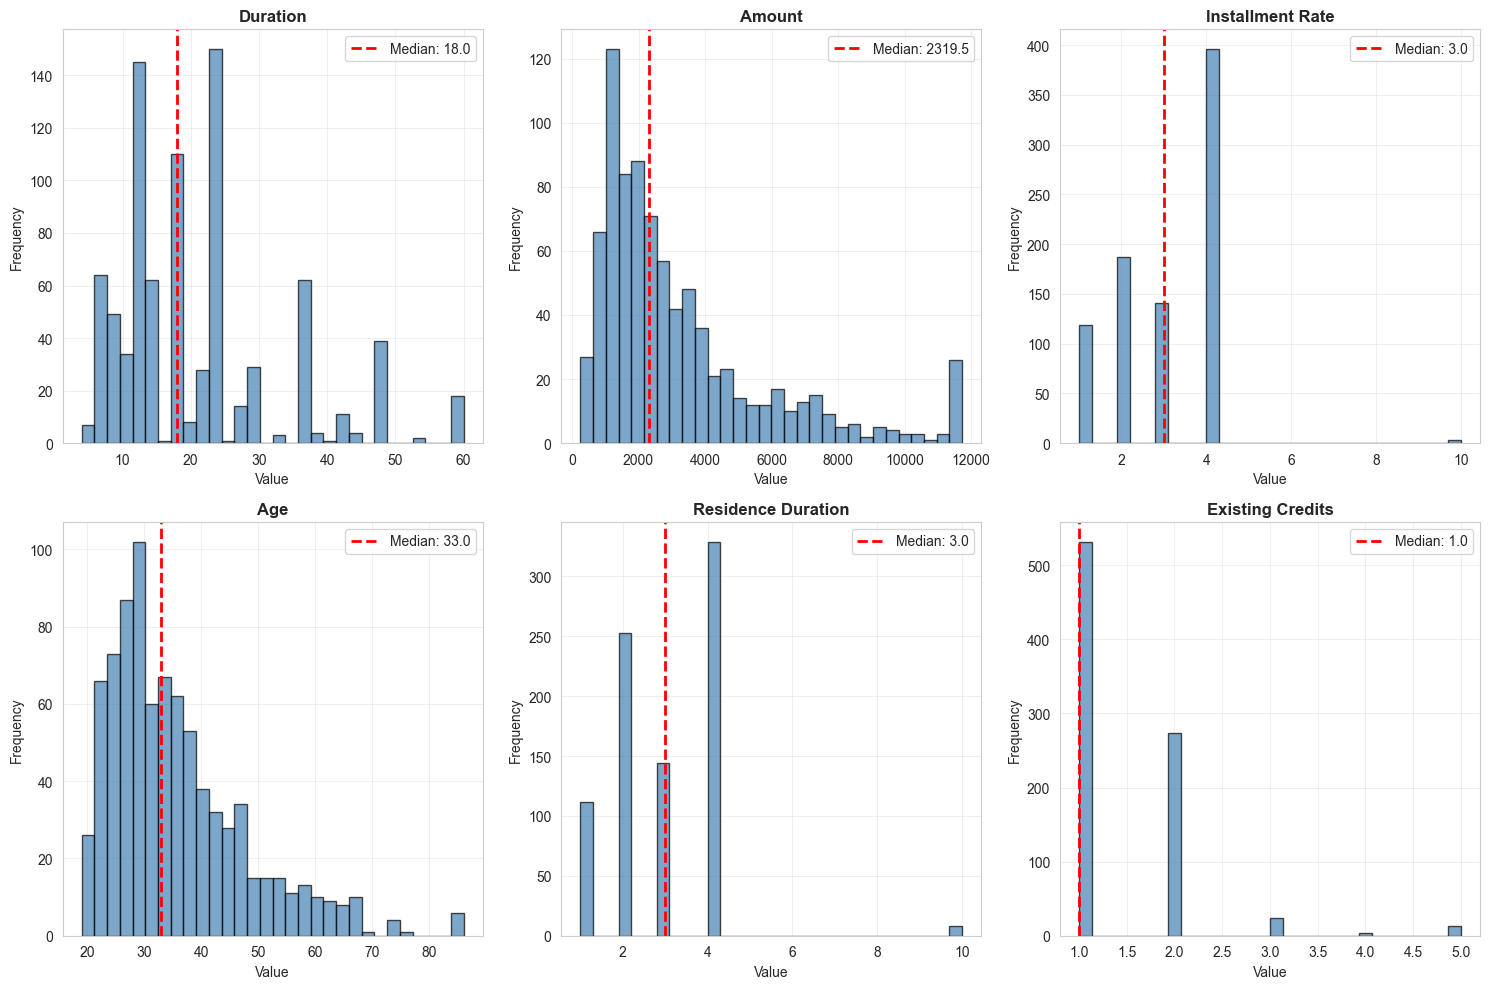


--- Categorical Features (Encoded as Numeric) ---


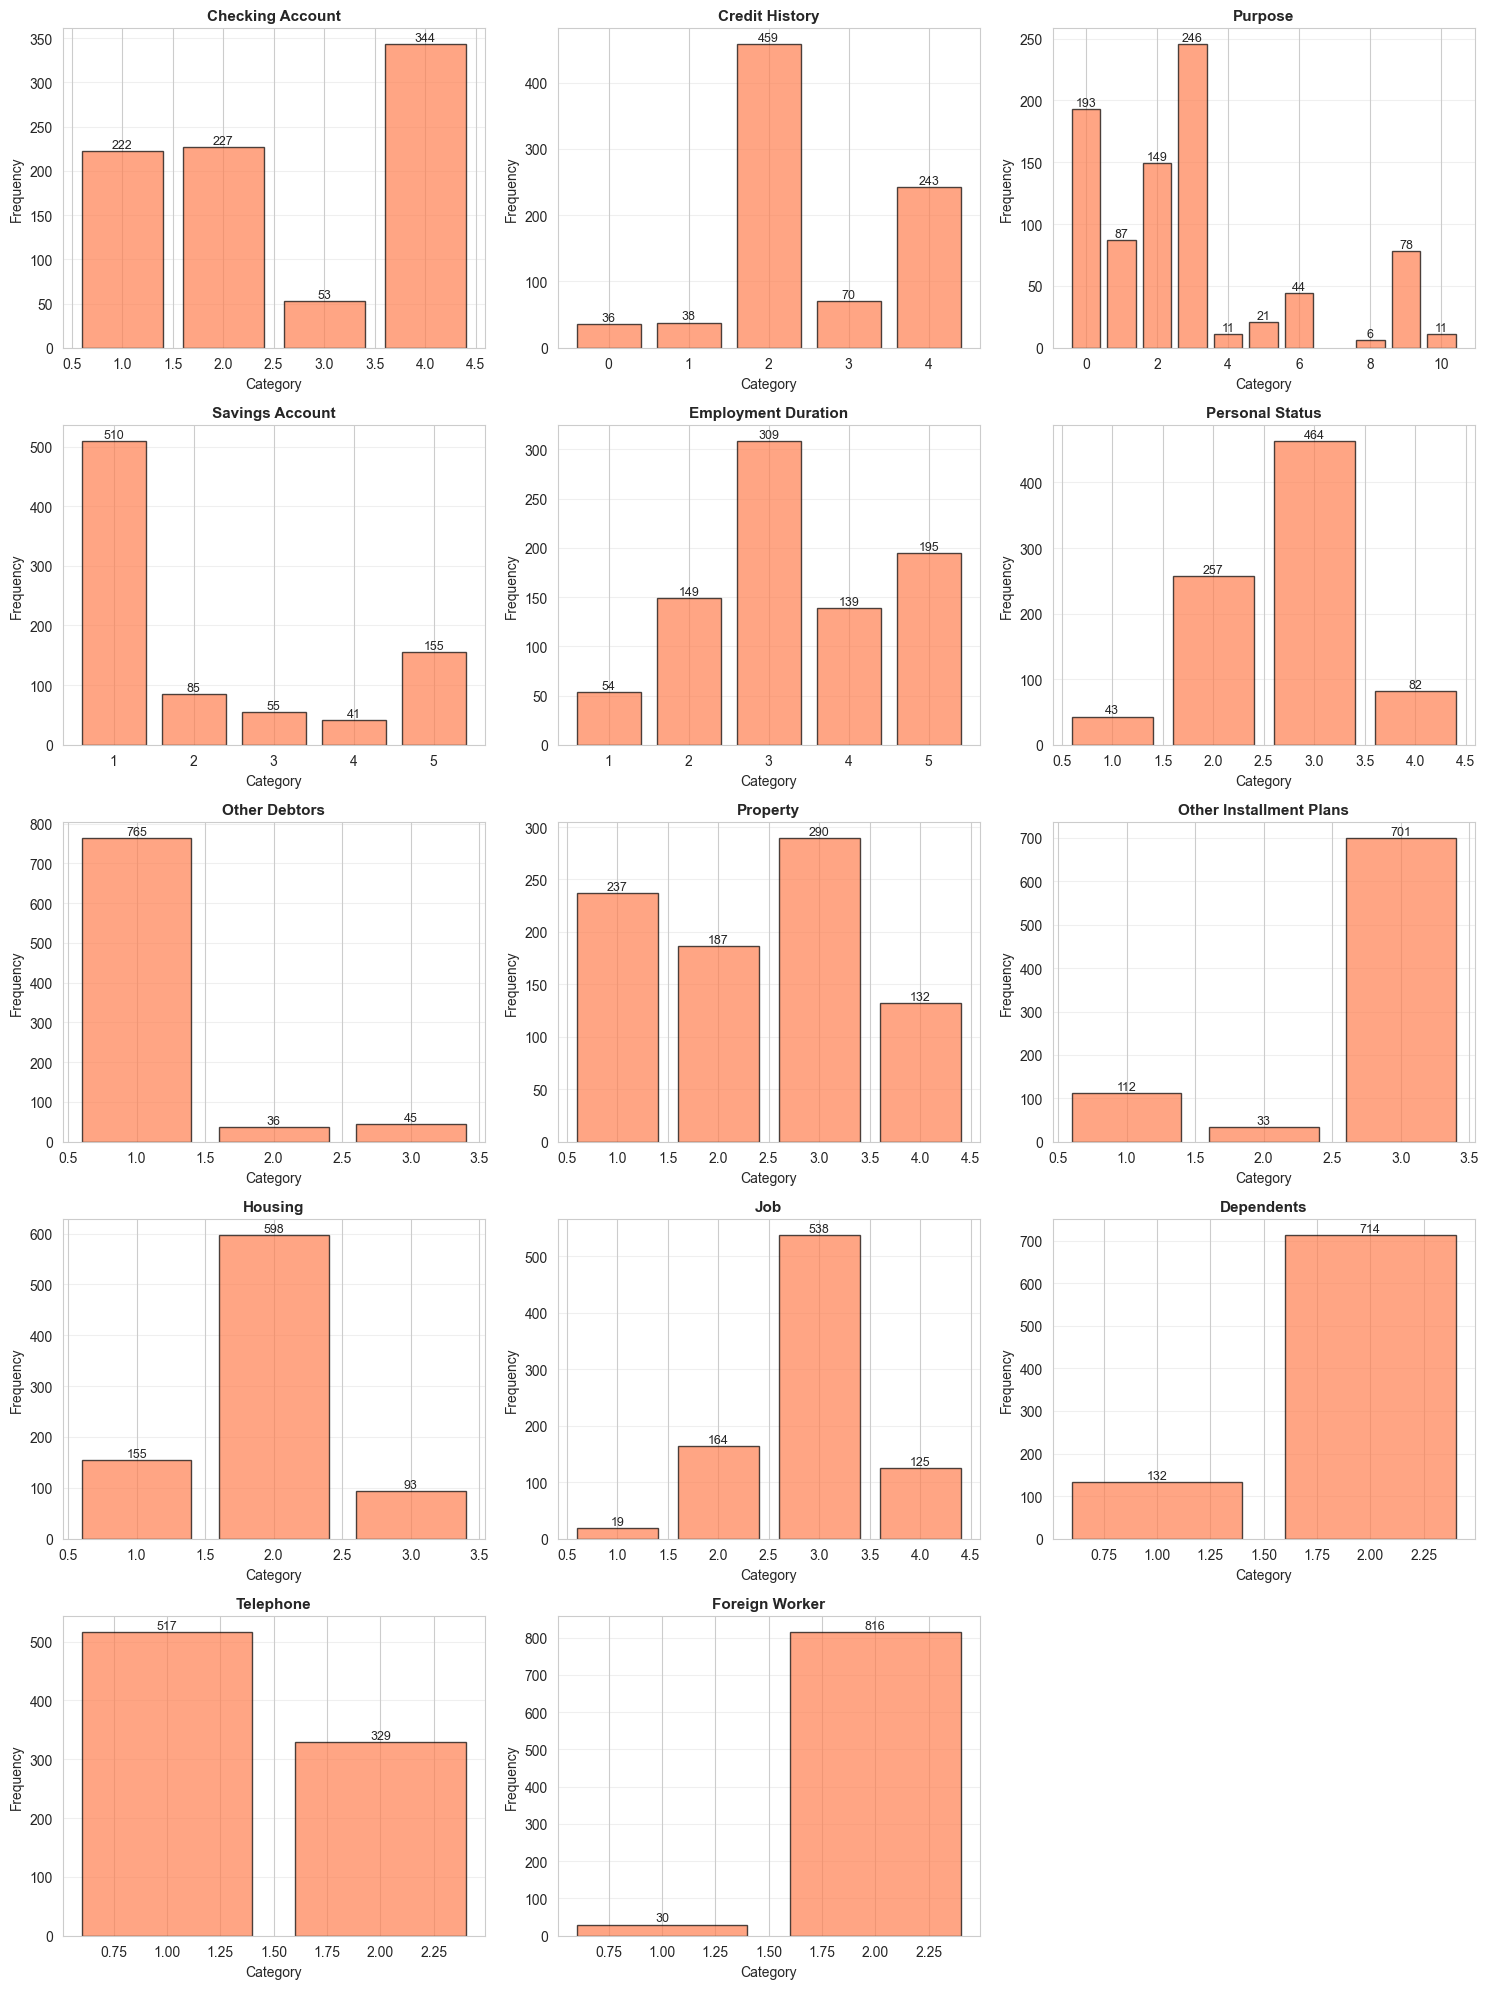


‚úì Univariate analysis complete for all features


In [13]:
print("\n[5.1] Univariate Analysis - All Features")

# Separate feature types for better visualization
categorical_features = [col for col in df.select_dtypes(include=[np.number]).columns 
                       if col not in continuous_features and col != 'credit_risk']

print(f"\nContinuous/Count Features: {len(continuous_features)}")
print(f"Categorical Features (encoded): {len(categorical_features)}")

# --- Part A: Continuous Features ---
print("\n--- Continuous Features Statistics ---")
display(df[continuous_features].describe().round(2))

# Visualize continuous distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(continuous_features):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_title(f'{col.replace("_", " ").title()}', fontweight='bold', fontsize=12)
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].axvline(df[col].median(), color='red', linestyle='--', linewidth=2,
                     label=f'Median: {df[col].median():.1f}')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/figures/01_univariate_continuous.png', dpi=300, bbox_inches='tight')
plt.show()

# --- Part B: Categorical Features ---
print("\n--- Categorical Features (Encoded as Numeric) ---")

# Visualize categorical distributions (bar charts)
n_categorical = len(categorical_features)
n_rows = (n_categorical + 2) // 3  # Ceiling division
fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(categorical_features):
    value_counts = df[col].value_counts().sort_index()
    axes[idx].bar(value_counts.index, value_counts.values, 
                 edgecolor='black', alpha=0.7, color='coral')
    axes[idx].set_title(f'{col.replace("_", " ").title()}', fontweight='bold', fontsize=11)
    axes[idx].set_xlabel('Category')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, v in enumerate(value_counts.values):
        axes[idx].text(value_counts.index[i], v + max(value_counts.values)*0.01, 
                      str(v), ha='center', fontsize=9)

# Remove empty subplots
for idx in range(n_categorical, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig('outputs/figures/01_univariate_categorical.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n‚úì Univariate analysis complete for all features")

## 5.2) Target Distribution


[5.2] Target Distribution Analysis

Credit Risk Distribution:
  1: 590 (69.7%)
  0: 256 (30.3%)


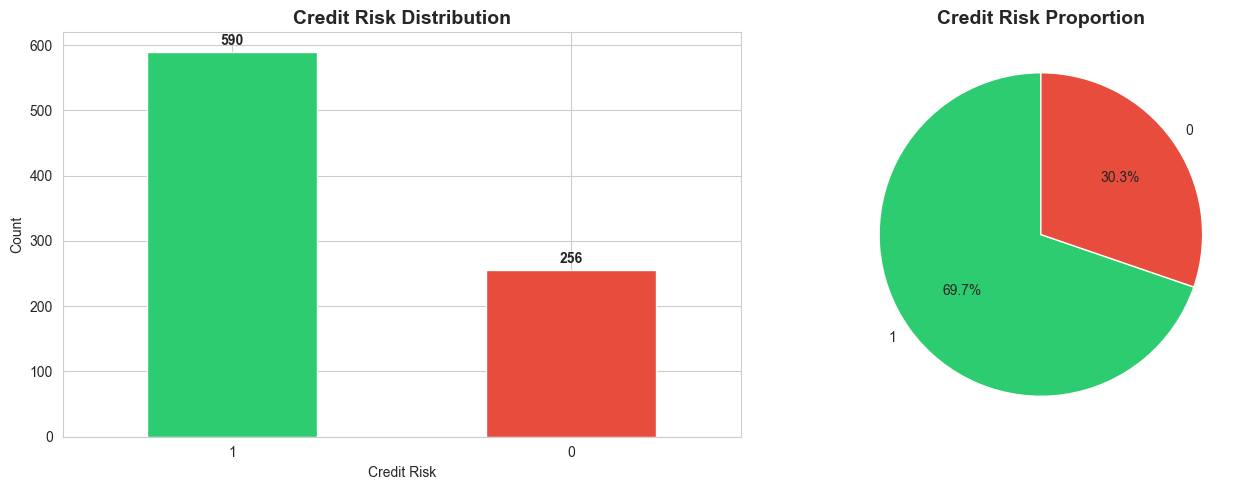

In [14]:
print("\n[5.2] Target Distribution Analysis")

target_counts = df['credit_risk'].value_counts()
target_pct = df['credit_risk'].value_counts(normalize=True) * 100

print(f"\nCredit Risk Distribution:")
for value, count in target_counts.items():
    print(f"  {value}: {count} ({target_pct[value]:.1f}%)")

# Visualize target
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
target_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Credit Risk Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Credit Risk')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)
for i, v in enumerate(target_counts):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(target_counts, labels=target_counts.index, autopct='%1.1f%%',
           colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Credit Risk Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('outputs/figures/02_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## 5.3) Bivariate Analysis - Numerical vs Target


[5.3] Bivariate Analysis - Numerical Features vs Target


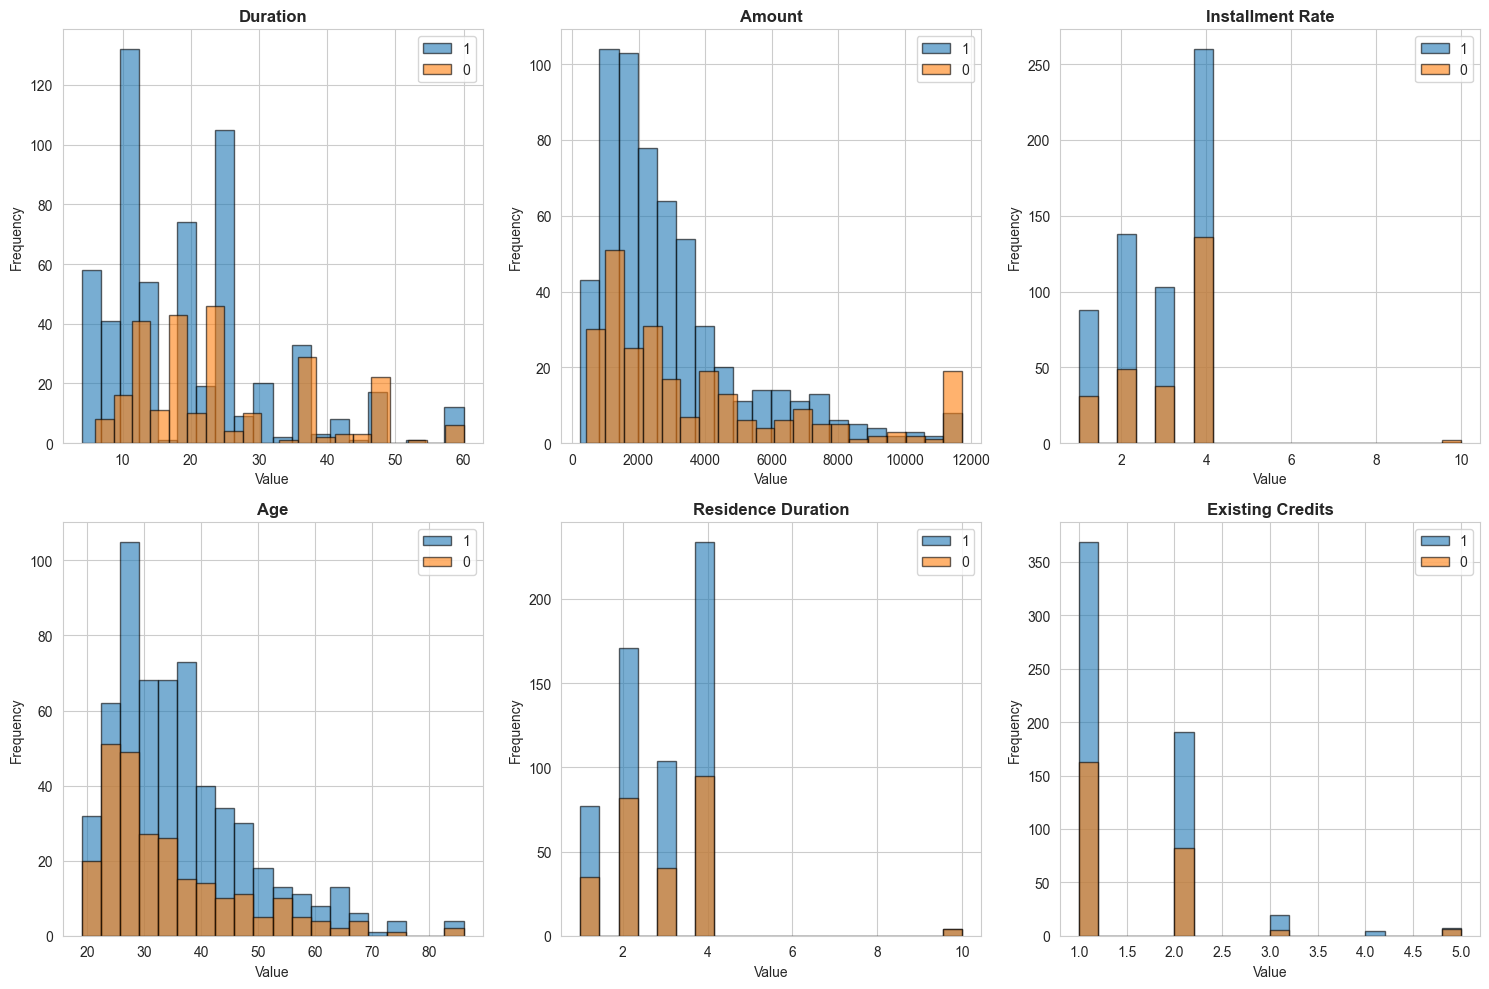


Mean values by credit risk:


duration   amount  installment_rate    age  residence_duration  \
credit_risk                                                                   
0               24.34  3777.31              3.15  34.18                2.89   
1               19.48  2984.77              2.92  36.25                2.89   

             existing_credits  
credit_risk                    
0                        1.45  
1                        1.46

In [15]:
print("\n[5.3] Bivariate Analysis - Numerical Features vs Target")

# Compare distributions by target
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(continuous_features):
    for risk in df['credit_risk'].unique():
        data = df[df['credit_risk'] == risk][col]
        axes[idx].hist(data, bins=20, alpha=0.6, label=risk, edgecolor='black')
    
    axes[idx].set_title(f'{col.replace("_", " ").title()}', fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()

plt.tight_layout()
plt.savefig('outputs/figures/03_bivariate_numerical.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical comparison
print("\nMean values by credit risk:")
comparison = df.groupby('credit_risk')[continuous_features].mean().round(2)
display(comparison)

## 5.4) Multivariate Analysis - Correlation Matrix


[5.4] Correlation Analysis


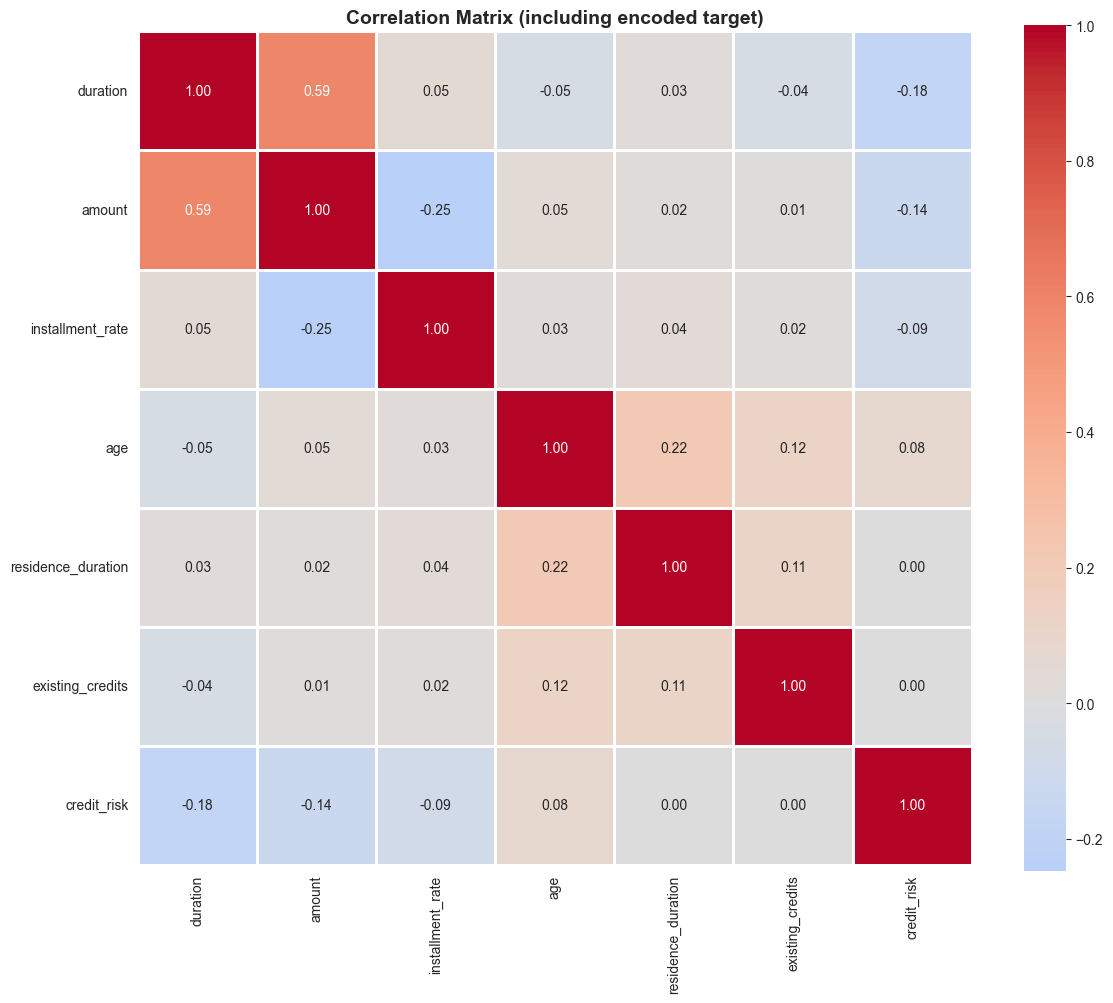


Top 5 features correlated with credit_risk:
duration              0.181810
amount                0.139144
installment_rate      0.089268
age                   0.078563
residence_duration    0.002312
Name: credit_risk, dtype: float64


In [16]:
print("\n[5.4] Correlation Analysis")

df_corr = df.copy()

# Asure target is numeric
df_corr['credit_risk'] = pd.to_numeric(df_corr['credit_risk'], errors='coerce').astype(int)

corr_features = continuous_features + ['credit_risk']
corr_matrix = df_corr[corr_features].corr()

# Visualize
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
           center=0, square=True, linewidths=1)
plt.title('Correlation Matrix (including encoded target)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('outputs/figures/04_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop 5 features correlated with credit_risk:")
target_corr = corr_matrix['credit_risk'].drop('credit_risk').abs().sort_values(ascending=False)
print(target_corr.head())

In [17]:
df['credit_risk'].value_counts()


credit_risk
1    590
0    256
Name: count, dtype: int64

## 5.5) Outlier Visualization (Post-Treatment)


[5.5] Outlier Visualization (Post-Treatment)


Feature  Outliers Percentage Lower_Bound Upper_Bound
0            duration        63       7.4%        -6.0        42.0
1              amount        60       7.1%     -2492.9      7852.1
2    installment_rate         3       0.4%        -1.0         7.0
3                 age        30       3.5%         4.9        63.9
4  residence_duration         8       0.9%        -1.0         7.0
5    existing_credits        17       2.0%        -0.5         3.5

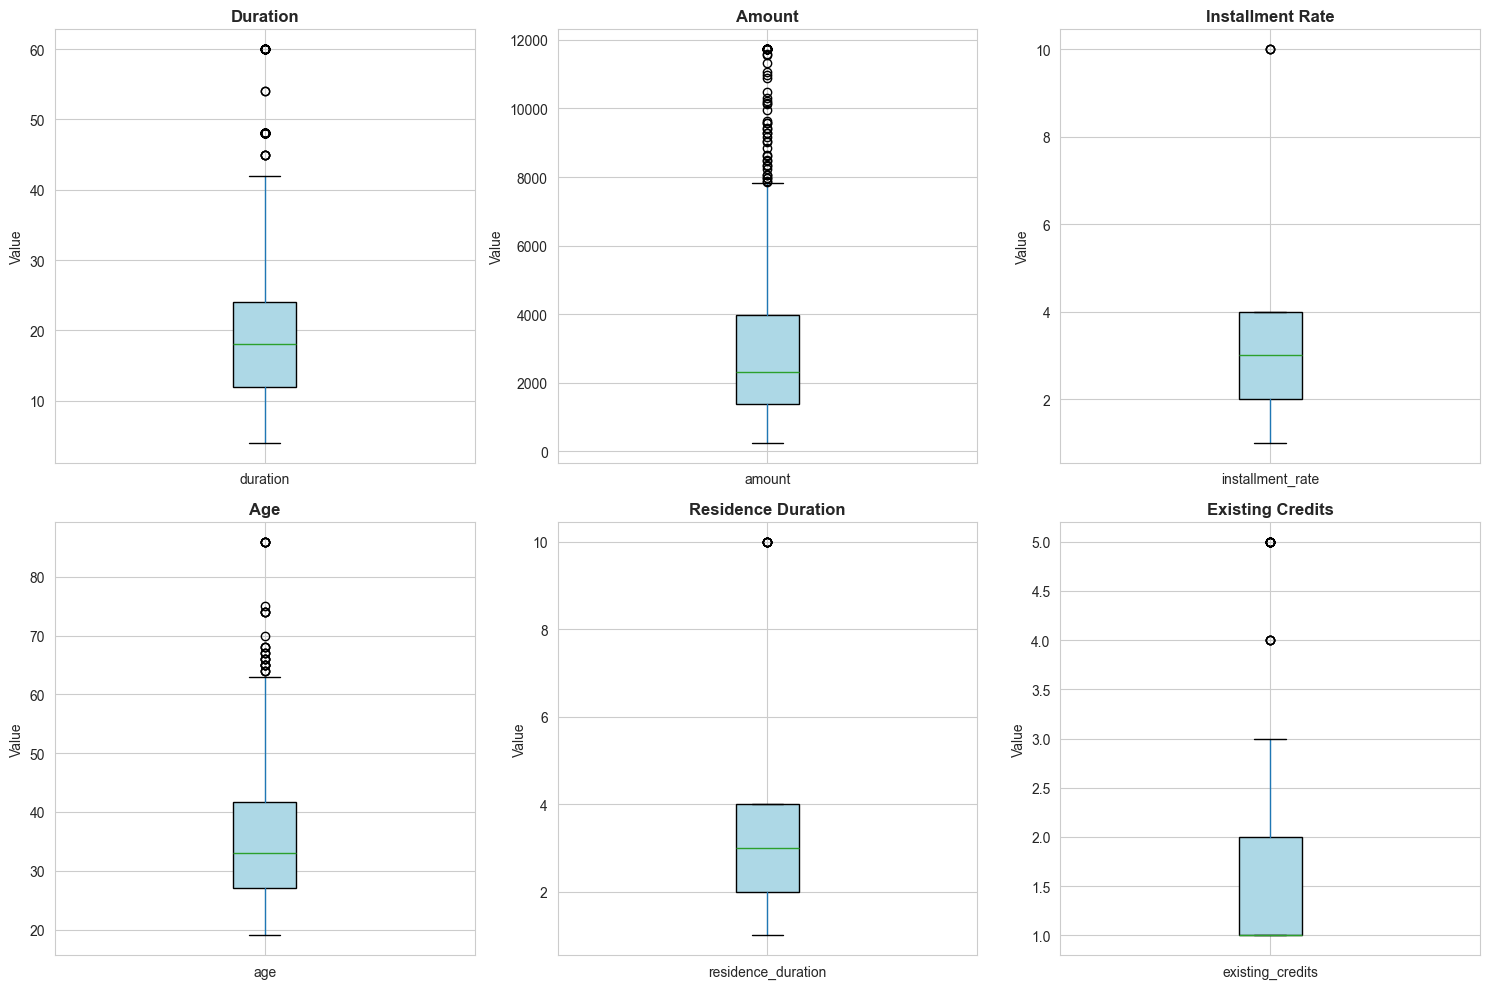

In [18]:
print("\n[5.5] Outlier Visualization (Post-Treatment)")

outlier_summary = []
for col in continuous_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_pct = 100 * outliers / len(df)
    
    outlier_summary.append({
        'Feature': col,
        'Outliers': outliers,
        'Percentage': f"{outlier_pct:.1f}%",
        'Lower_Bound': f"{lower:.1f}",
        'Upper_Bound': f"{upper:.1f}"
    })

outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df)

# Visualize with boxplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(continuous_features):
    df.boxplot(column=col, ax=axes[idx], patch_artist=True,
              boxprops=dict(facecolor='lightblue'))
    axes[idx].set_title(f'{col.replace("_", " ").title()}', fontweight='bold')
    axes[idx].set_ylabel('Value')

plt.tight_layout()
plt.savefig('outputs/figures/05_outlier_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

## 6) DATA PREPROCESSING

In [19]:
# Create copy for preprocessing
df_processed = df.copy()

## 6.1) Categorical Encoding

In [20]:
print("\n[6.1] Categorical Encoding")

# Separate features and target
X = df_processed.drop('credit_risk', axis=1)
y = df_processed['credit_risk']

# All features are currently numeric (already encoded in original data)
# But we encode target to binary
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # good=1, bad=0 (or vice versa)
print(f"\n  Target encoded: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Save label encoder
import pickle
with open('outputs/transformers/label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)
print("  ‚úì Label encoder saved")


[6.1] Categorical Encoding

  Target encoded: {'0': np.int64(0), '1': np.int64(1)}
  ‚úì Label encoder saved


## 6.2) Numerical Scaling

In [21]:
print("\n[6.2] Numerical Scaling (StandardScaler)")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print(f"\n  ‚úì Scaled {X.shape[1]} features")
print(f"  Sample means after scaling: {X_scaled.mean().round(3).head().to_dict()}")
print(f"  Sample stds after scaling:  {X_scaled.std().round(3).head().to_dict()}")

# Save scaler
with open('outputs/transformers/standard_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("  ‚úì Scaler saved")


[6.2] Numerical Scaling (StandardScaler)

  ‚úì Scaled 20 features
  Sample means after scaling: {'checking_account': -0.0, 'duration': 0.0, 'credit_history': -0.0, 'purpose': 0.0, 'amount': 0.0}
  Sample stds after scaling:  {'checking_account': 1.001, 'duration': 1.001, 'credit_history': 1.001, 'purpose': 1.001, 'amount': 1.001}
  ‚úì Scaler saved


## 6.3) Feature Engineering

In [22]:
print("\n[6.3] Feature Engineering")

# Create new features
X_scaled['amount_per_month'] = df_processed['amount'] / df_processed['duration']
X_scaled['age_at_end'] = df_processed['age'] + (df_processed['duration'] / 12)
X_scaled['debt_burden'] = df_processed['installment_rate'] * df_processed['duration']

engineered_features = ['amount_per_month', 'age_at_end', 'debt_burden']
print(f"\n  Created {len(engineered_features)} new features:")
for feat in engineered_features:
    print(f"    - {feat}")

# Scale new features
scaler_new = StandardScaler()
X_scaled[engineered_features] = scaler_new.fit_transform(X_scaled[engineered_features])



[6.3] Feature Engineering

  Created 3 new features:
    - amount_per_month
    - age_at_end
    - debt_burden


## 6.4) Train/Test Split

In [23]:
pd.Series(y_encoded).value_counts()

1    590
0    256
Name: count, dtype: int64

In [24]:
print("\n[6.4] Train/Test Split")

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\n  Training set:   {X_train.shape[0]} samples ({100*len(X_train)/len(X_scaled):.0f}%)")
print(f"  Test set:       {X_test.shape[0]} samples ({100*len(X_test)/len(X_scaled):.0f}%)")
print(f"  Features:       {X_train.shape[1]}")
print(f"\n  Target distribution in train:")
print(f"    Class 0: {(y_train == 0).sum()} ({100*(y_train == 0).sum()/len(y_train):.1f}%)")
print(f"    Class 1: {(y_train == 1).sum()} ({100*(y_train == 1).sum()/len(y_train):.1f}%)")

# Save splits
X_train.to_csv('data/X_train.csv', index=False)
X_test.to_csv('data/X_test.csv', index=False)
pd.Series(y_train).to_csv('data/y_train.csv', index=False, header=['credit_risk'])
pd.Series(y_test).to_csv('data/y_test.csv', index=False, header=['credit_risk'])
print("\n  ‚úì Train/test splits saved to data/")


[6.4] Train/Test Split

  Training set:   676 samples (80%)
  Test set:       170 samples (20%)
  Features:       23

  Target distribution in train:
    Class 0: 205 (30.3%)
    Class 1: 471 (69.7%)

  ‚úì Train/test splits saved to data/


# 7) DATA VERSIONING v2 - PROCESSED DATA

In [25]:
# Save fully processed dataset
processed_df = X_scaled.copy()
processed_df['credit_risk'] = y_encoded
processed_path = 'data/german_credit_processed_v2.csv'
processed_df.to_csv(processed_path, index=False)
print(f"‚úì Processed dataset saved: {processed_path}")

# Add to DVC
try:
    subprocess.run(['dvc', 'add', processed_path], capture_output=True, check=True)
    print(f"‚úì DVC tracking enabled for {processed_path}")
    print("  ‚Üí Run: git add data/german_credit_processed_v2.csv.dvc")
    print("  ‚Üí Run: git commit -m 'v2: preprocessed dataset ready for modeling'")
except:
    print("‚ö† DVC add skipped (not installed or already tracked)")

‚úì Processed dataset saved: data/german_credit_processed_v2.csv
‚ö† DVC add skipped (not installed or already tracked)


# 8) MODEL TRAINING AND EVALUATION

## 8.1) Load Preprocessed Data

In [26]:
print("\n[8.1] Loading Preprocessed Data")

# Verify data files exist
from pathlib import Path

data_files = {
    'X_train': 'data/X_train.csv',
    'X_test': 'data/X_test.csv',
    'y_train': 'data/y_train.csv',
    'y_test': 'data/y_test.csv'
}

print("\nVerifying data files...")
for name, path in data_files.items():
    exists = Path(path).exists()
    status = "‚úì" if exists else "‚úó"
    print(f"  {status} {path}")

# Load data
X_train = pd.read_csv('data/X_train.csv')
X_test = pd.read_csv('data/X_test.csv')
y_train = pd.read_csv('data/y_train.csv').squeeze()
y_test = pd.read_csv('data/y_test.csv').squeeze()

print(f"\n‚úì Data loaded successfully")
print(f"  Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"  Test set:     {X_test.shape[0]} samples, {X_test.shape[1]} features")
print(f"\n  Target distribution (train):")
print(f"    Class 0: {(y_train == 0).sum()} ({100*(y_train == 0).sum()/len(y_train):.1f}%)")
print(f"    Class 1: {(y_train == 1).sum()} ({100*(y_train == 1).sum()/len(y_train):.1f}%)")


[8.1] Loading Preprocessed Data

Verifying data files...
  ‚úì data/X_train.csv
  ‚úì data/X_test.csv
  ‚úì data/y_train.csv
  ‚úì data/y_test.csv

‚úì Data loaded successfully
  Training set: 676 samples, 23 features
  Test set:     170 samples, 23 features

  Target distribution (train):
    Class 0: 205 (30.3%)
    Class 1: 471 (69.7%)


# 8.2) Model Selection and Training

In [27]:
print("\n[8.2] Model Selection and Hyperparameter Tuning")
print("\nStrategy: Interpretability > Performance (as per ML Canvas)")

# Define models with hyperparameter grids
models_config = {
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42, max_iter=1000),
        "params": {
            'C': [0.1, 1.0, 10.0],
            'class_weight': ['balanced', None],
            'solver': ['lbfgs']
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            'max_depth': [5, 10, 15],
            'min_samples_split': [20, 50, 100],
            'class_weight': ['balanced', None]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            'n_estimators': [50, 100],
            'max_depth': [10, 15],
            'min_samples_split': [20, 50],
            'class_weight': ['balanced', None]
        }
    }
}

print(f"\n‚úì Configured {len(models_config)} models for training")
print("  - Logistic Regression (baseline interpretable)")
print("  - Decision Tree (rule-based)")
print("  - Random Forest (ensemble)")


[8.2] Model Selection and Hyperparameter Tuning

Strategy: Interpretability > Performance (as per ML Canvas)

‚úì Configured 3 models for training
  - Logistic Regression (baseline interpretable)
  - Decision Tree (rule-based)
  - Random Forest (ensemble)


## 8.3) Training Models with 5-Fold Cross-Validation

In [28]:
print("\n[8.3] Training Models with 5-Fold Cross-Validation")

# Scorer: AUC-ROC (primary metric from ML Canvas)
auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

trained_models = {}
cv_results = []

for name, config in models_config.items():
    print(f"\n{'='*60}")
    print(f"Training: {name}")
    print(f"{'='*60}")
    
    # Grid Search with 5-fold CV
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=5,  # 5-fold stratified (default for classification)
        scoring=auc_scorer,
        n_jobs=-1,
        verbose=1
    )
    
    # Train
    grid_search.fit(X_train, y_train)
    
    # Store best model
    best_model = grid_search.best_estimator_
    trained_models[name] = best_model
    
    # Cross-validation scores
    cv_scores = cross_val_score(best_model, X_train, y_train, 
                                cv=5, scoring=auc_scorer)
    
    print(f"\n‚úì Best Parameters: {grid_search.best_params_}")
    print(f"  CV AUC-ROC: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    
    # Test set evaluation
    y_pred_test = best_model.predict(X_test)
    
    # Get probability scores
    if hasattr(best_model, 'predict_proba'):
        y_score_test = best_model.predict_proba(X_test)[:, 1]
    else:
        y_score_test = None
    
    # Calculate all metrics
    result = {
        'Model': name,
        'Best_Params': str(grid_search.best_params_),
        'CV_AUC_mean': cv_scores.mean(),
        'CV_AUC_std': cv_scores.std(),
        'Test_Accuracy': accuracy_score(y_test, y_pred_test),
        'Test_Precision': precision_score(y_test, y_pred_test, zero_division=0),
        'Test_Recall': recall_score(y_test, y_pred_test, zero_division=0),
        'Test_F1': f1_score(y_test, y_pred_test, zero_division=0),
        'Test_AUC_ROC': roc_auc_score(y_test, y_score_test) if y_score_test is not None else None
    }
    
    cv_results.append(result)
    
    print(f"\n  Test Set Performance:")
    print(f"    AUC-ROC:   {result['Test_AUC_ROC']:.4f}" if result['Test_AUC_ROC'] else "    AUC-ROC:   N/A")
    print(f"    Accuracy:  {result['Test_Accuracy']:.4f}")
    print(f"    Precision: {result['Test_Precision']:.4f}")
    print(f"    Recall:    {result['Test_Recall']:.4f}")
    print(f"    F1-Score:  {result['Test_F1']:.4f}")

print("\n‚úì All models trained successfully")


[8.3] Training Models with 5-Fold Cross-Validation

Training: Logistic Regression
Fitting 5 folds for each of 6 candidates, totalling 30 fits



‚úì Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'solver': 'lbfgs'}
  CV AUC-ROC: nan (+/- nan)

  Test Set Performance:
    AUC-ROC:   0.8448
    Accuracy:  0.7176
    Precision: 0.8989
    Recall:    0.6723
    F1-Score:  0.7692

Training: Decision Tree
Fitting 5 folds for each of 18 candidates, totalling 90 fits

‚úì Best Parameters: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_split': 20}
  CV AUC-ROC: nan (+/- nan)

  Test Set Performance:
    AUC-ROC:   0.7180
    Accuracy:  0.6765
    Precision: 0.8556
    Recall:    0.6471
    F1-Score:  0.7368

Training: Random Forest
Fitting 5 folds for each of 16 candidates, totalling 80 fits

‚úì Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 50}
  CV AUC-ROC: nan (+/- nan)

  Test Set Performance:
    AUC-ROC:   0.8504
    Accuracy:  0.7824
    Precision: 0.8727
    Recall:    0.8067
    F1-Score:  0.8384

‚úì All models trained successfully


## 8.4) Model Comparison


[8.4] Model Comparison

--- Model Performance Comparison ---
(Sorted by AUC-ROC - Primary Metric)


Model  CV_AUC_mean  Test_AUC_ROC  Test_Accuracy  \
0        Random Forest          NaN      0.850387       0.782353   
1  Logistic Regression          NaN      0.844785       0.717647   
2        Decision Tree          NaN      0.717993       0.676471   

   Test_Precision  Test_Recall   Test_F1  
0        0.872727     0.806723  0.838428  
1        0.898876     0.672269  0.769231  
2        0.855556     0.647059  0.736842


--- AUC-ROC Threshold Analysis (Target: 0.75) ---
‚úì 2 model(s) meet the threshold:
  - Random Forest: AUC-ROC = 0.8504
  - Logistic Regression: AUC-ROC = 0.8448

‚úì Comparison saved to: reports/model_comparison.csv


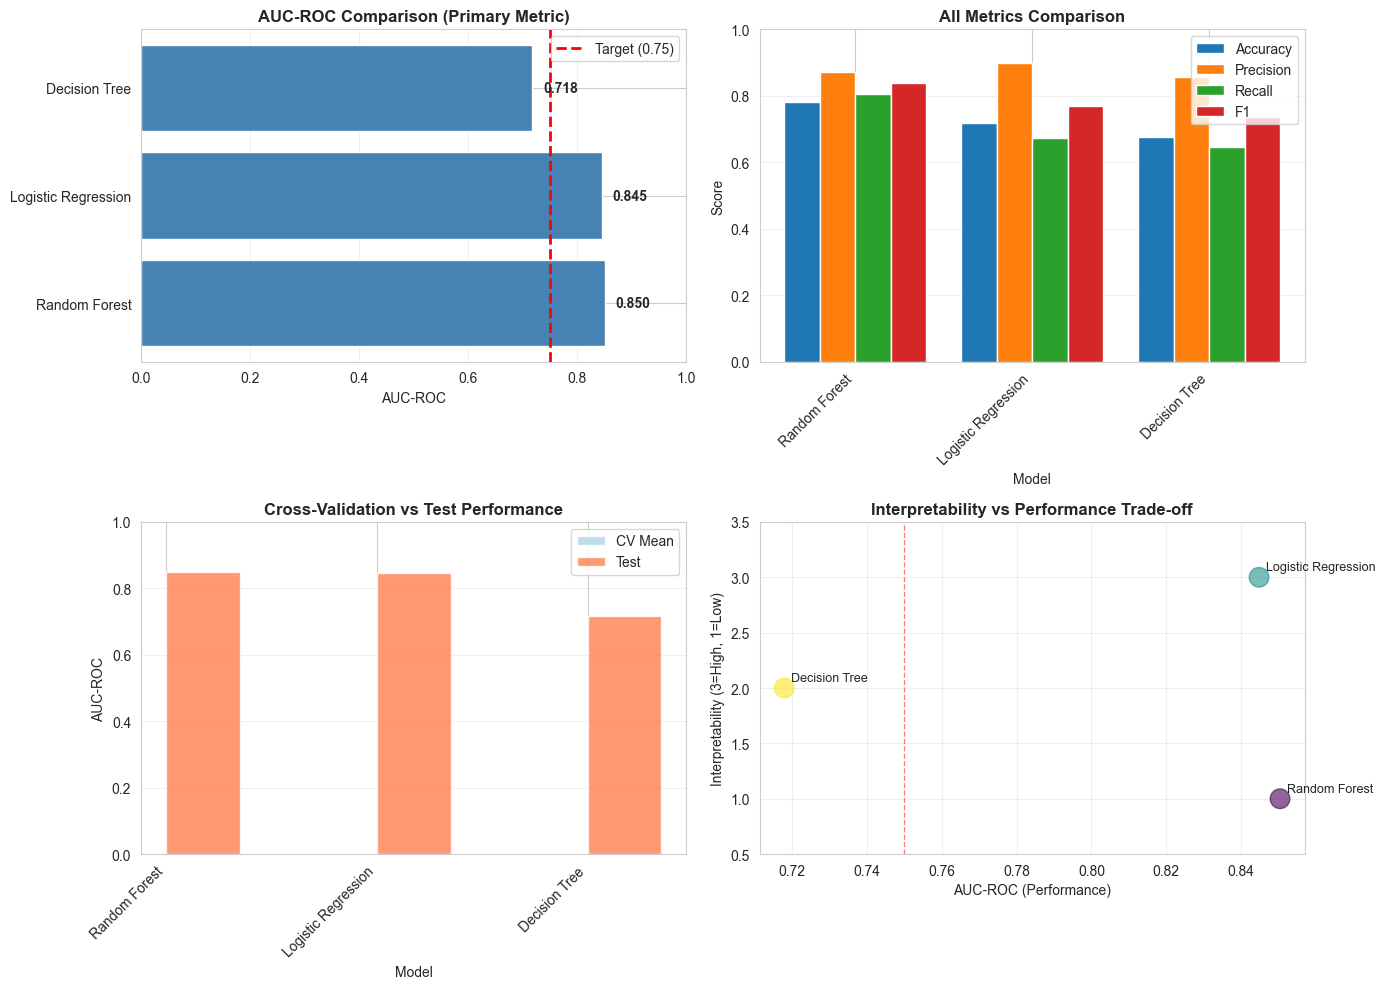


MODEL SELECTION (Following ML Canvas Priority)

‚úì Multiple models meet AUC-ROC > 0.75
  Following 'Interpretability > Performance' principle:
  ‚Üí Selected: Logistic Regression

üèÜ Final Model: Logistic Regression
   AUC-ROC:   0.8448
   Accuracy:  0.7176
   F1-Score:  0.7692


In [29]:
print("\n[8.4] Model Comparison")

# Create comparison DataFrame
results_df = pd.DataFrame(cv_results)

# Sort by AUC-ROC (primary metric from ML Canvas)
results_df = results_df.sort_values('Test_AUC_ROC', ascending=False).reset_index(drop=True)

print("\n--- Model Performance Comparison ---")
print("(Sorted by AUC-ROC - Primary Metric)")
display(results_df[['Model', 'CV_AUC_mean', 'Test_AUC_ROC', 'Test_Accuracy', 
                    'Test_Precision', 'Test_Recall', 'Test_F1']])

# Check if any model meets the threshold
auc_threshold = 0.75
models_above_threshold = results_df[results_df['Test_AUC_ROC'] >= auc_threshold]

print(f"\n--- AUC-ROC Threshold Analysis (Target: {auc_threshold}) ---")
if len(models_above_threshold) > 0:
    print(f"‚úì {len(models_above_threshold)} model(s) meet the threshold:")
    for idx, row in models_above_threshold.iterrows():
        print(f"  - {row['Model']}: AUC-ROC = {row['Test_AUC_ROC']:.4f}")
else:
    print(f"‚ö† No models meet the threshold of {auc_threshold}")
    print("  Best AUC-ROC achieved:", results_df.iloc[0]['Test_AUC_ROC'])

# Save comparison
Path('reports').mkdir(exist_ok=True)
results_df.to_csv('reports/model_comparison.csv', index=False)
print("\n‚úì Comparison saved to: reports/model_comparison.csv")

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: AUC-ROC Comparison (Primary Metric)
ax1 = axes[0, 0]
bars = ax1.barh(results_df['Model'], results_df['Test_AUC_ROC'], color='steelblue')
ax1.axvline(x=auc_threshold, color='red', linestyle='--', linewidth=2, label=f'Target ({auc_threshold})')
ax1.set_xlabel('AUC-ROC')
ax1.set_title('AUC-ROC Comparison (Primary Metric)', fontweight='bold')
ax1.set_xlim(0, 1)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (model, auc) in enumerate(zip(results_df['Model'], results_df['Test_AUC_ROC'])):
    ax1.text(auc + 0.02, i, f'{auc:.3f}', va='center', fontweight='bold')

# Plot 2: All Metrics Comparison
ax2 = axes[0, 1]
metrics_to_plot = ['Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1']
x = np.arange(len(results_df))
width = 0.2

for i, metric in enumerate(metrics_to_plot):
    offset = (i - len(metrics_to_plot)/2) * width + width/2
    ax2.bar(x + offset, results_df[metric], width, label=metric.replace('Test_', ''))

ax2.set_xlabel('Model')
ax2.set_ylabel('Score')
ax2.set_title('All Metrics Comparison', fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax2.legend()
ax2.set_ylim(0, 1)
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: CV vs Test AUC-ROC (Generalization Check)
ax3 = axes[1, 0]
x_pos = np.arange(len(results_df))
width = 0.35
ax3.bar(x_pos - width/2, results_df['CV_AUC_mean'], width, 
        label='CV Mean', alpha=0.8, color='lightblue', yerr=results_df['CV_AUC_std'])
ax3.bar(x_pos + width/2, results_df['Test_AUC_ROC'], width, 
        label='Test', alpha=0.8, color='coral')
ax3.set_xlabel('Model')
ax3.set_ylabel('AUC-ROC')
ax3.set_title('Cross-Validation vs Test Performance', fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_ylim(0, 1)

# Plot 4: Interpretability vs Performance Trade-off
ax4 = axes[1, 1]
interpretability_scores = {'Logistic Regression': 3, 'Decision Tree': 2, 'Random Forest': 1}
results_df['Interpretability'] = results_df['Model'].map(interpretability_scores)

scatter = ax4.scatter(results_df['Test_AUC_ROC'], results_df['Interpretability'], 
                     s=200, alpha=0.6, c=results_df.index, cmap='viridis')

for idx, row in results_df.iterrows():
    ax4.annotate(row['Model'], 
                (row['Test_AUC_ROC'], row['Interpretability']),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

ax4.set_xlabel('AUC-ROC (Performance)')
ax4.set_ylabel('Interpretability (3=High, 1=Low)')
ax4.set_title('Interpretability vs Performance Trade-off', fontweight='bold')
ax4.axvline(x=auc_threshold, color='red', linestyle='--', linewidth=1, alpha=0.5)
ax4.grid(True, alpha=0.3)
ax4.set_ylim(0.5, 3.5)

plt.tight_layout()
Path('reports/figures').mkdir(parents=True, exist_ok=True)
plt.savefig('reports/figures/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Model Selection Logic (following ML Canvas priority)
print("\n" + "="*60)
print("MODEL SELECTION (Following ML Canvas Priority)")
print("="*60)

# Filter models that meet AUC threshold
qualified_models = results_df[results_df['Test_AUC_ROC'] >= auc_threshold].copy()

if len(qualified_models) > 0:
    # Among qualified, select most interpretable
    qualified_models['Interpretability'] = qualified_models['Model'].map(interpretability_scores)
    qualified_models = qualified_models.sort_values('Interpretability', ascending=False)
    
    best_model_name = qualified_models.iloc[0]['Model']
    print(f"\n‚úì Multiple models meet AUC-ROC > {auc_threshold}")
    print(f"  Following 'Interpretability > Performance' principle:")
    print(f"  ‚Üí Selected: {best_model_name}")
else:
    # If none meet threshold, select best AUC-ROC (but warn)
    best_model_name = results_df.iloc[0]['Model']
    print(f"\n‚ö† No models meet AUC-ROC > {auc_threshold} threshold")
    print(f"  ‚Üí Selected best available: {best_model_name}")
    print(f"  ‚Üí AUC-ROC: {results_df.iloc[0]['Test_AUC_ROC']:.4f}")

best_model = trained_models[best_model_name]
best_metrics = results_df[results_df['Model'] == best_model_name].iloc[0]

print(f"\nüèÜ Final Model: {best_model_name}")
print(f"   AUC-ROC:   {best_metrics['Test_AUC_ROC']:.4f}")
print(f"   Accuracy:  {best_metrics['Test_Accuracy']:.4f}")
print(f"   F1-Score:  {best_metrics['Test_F1']:.4f}")

## 8.5) Detailed Evaluation of Selected Model

In [30]:
print("\n[8.5] Detailed Evaluation of Selected Model")
print(f"\nModel: {best_model_name}")

y_pred_best = best_model.predict(X_test)

# Get probability scores
if hasattr(best_model, 'predict_proba'):
    y_score_best = best_model.predict_proba(X_test)[:, 1]
else:
    y_score_best = None

# Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred_best, 
                           target_names=['Bad Credit (0)', 'Good Credit (1)'],
                           digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
tn, fp, fn, tp = cm.ravel()

print("\n--- Confusion Matrix ---")
print(f"True Negatives (TN):  {tn:3d} - Correctly rejected bad credits")
print(f"False Positives (FP): {fp:3d} - Incorrectly approved bad credits (COST)")
print(f"False Negatives (FN): {fn:3d} - Incorrectly rejected good credits (OPPORTUNITY LOSS)")
print(f"True Positives (TP):  {tp:3d} - Correctly approved good credits")

# Business Metrics
print("\n--- Business Impact Analysis ---")
total_bad = tn + fp
total_good = fn + tp
print(f"Detection of bad credits:  {tn}/{total_bad} ({100*tn/total_bad:.1f}%)")
print(f"Approval of good credits:  {tp}/{total_good} ({100*tp/total_good:.1f}%)")
print(f"False Positive Rate (FPR): {fp/total_bad:.3f} (% bad credits incorrectly approved)")
print(f"False Negative Rate (FNR): {fn/total_good:.3f} (% good credits incorrectly rejected)")

# Cost-Benefit Analysis (illustrative)
avg_loan = 2320  # From dataset median
loss_per_fp = avg_loan * 0.80  # Assuming 80% loss on default
loss_per_fn = avg_loan * 0.05  # Assuming 5% profit opportunity lost

total_cost = (fp * loss_per_fp) + (fn * loss_per_fn)
print(f"\n--- Estimated Financial Impact (Illustrative) ---")
print(f"Cost of False Positives:  ‚Ç¨{fp * loss_per_fp:,.0f} ({fp} defaults √ó ‚Ç¨{loss_per_fp:.0f})")
print(f"Cost of False Negatives:  ‚Ç¨{fn * loss_per_fn:,.0f} ({fn} rejected √ó ‚Ç¨{loss_per_fn:.0f})")
print(f"Total Estimated Cost:     ‚Ç¨{total_cost:,.0f}")


[8.5] Detailed Evaluation of Selected Model

Model: Logistic Regression

--- Classification Report ---
                 precision    recall  f1-score   support

 Bad Credit (0)     0.5185    0.8235    0.6364        51
Good Credit (1)     0.8989    0.6723    0.7692       119

       accuracy                         0.7176       170
      macro avg     0.7087    0.7479    0.7028       170
   weighted avg     0.7848    0.7176    0.7294       170


--- Confusion Matrix ---
True Negatives (TN):   42 - Correctly rejected bad credits
False Positives (FP):   9 - Incorrectly approved bad credits (COST)
False Negatives (FN):  39 - Incorrectly rejected good credits (OPPORTUNITY LOSS)
True Positives (TP):   80 - Correctly approved good credits

--- Business Impact Analysis ---
Detection of bad credits:  42/51 (82.4%)
Approval of good credits:  80/119 (67.2%)
False Positive Rate (FPR): 0.176 (% bad credits incorrectly approved)
False Negative Rate (FNR): 0.328 (% good credits incorrectly rejected)

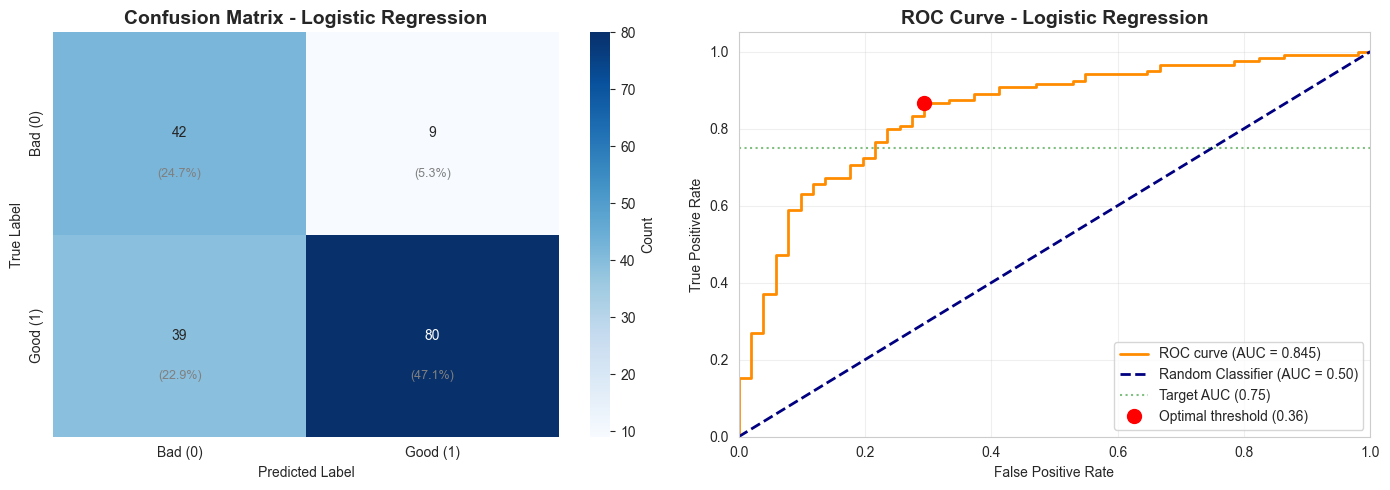

In [31]:
# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
           xticklabels=['Bad (0)', 'Good (1)'],
           yticklabels=['Bad (0)', 'Good (1)'],
           cbar_kws={'label': 'Count'})
axes[0].set_title(f'Confusion Matrix - {best_model_name}', fontweight='bold', fontsize=14)
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# Add percentages
for i in range(2):
    for j in range(2):
        text = axes[0].text(j + 0.5, i + 0.7, 
                          f'({100*cm[i,j]/cm.sum():.1f}%)',
                          ha="center", va="center", color="gray", fontsize=9)

# ROC Curve
if y_score_best is not None:
    fpr, tpr, thresholds = roc_curve(y_test, y_score_best)
    roc_auc = roc_auc_score(y_test, y_score_best)
    
    axes[1].plot(fpr, tpr, color='darkorange', lw=2, 
                label=f'ROC curve (AUC = {roc_auc:.3f})')
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
                label='Random Classifier (AUC = 0.50)')
    
    # Mark the threshold of 0.75
    if roc_auc >= 0.75:
        axes[1].axhline(y=0.75, color='green', linestyle=':', alpha=0.5, label='Target AUC (0.75)')
    
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title(f'ROC Curve - {best_model_name}', fontweight='bold', fontsize=14)
    axes[1].legend(loc="lower right")
    axes[1].grid(True, alpha=0.3)
    
    # Add optimal threshold point (Youden's index)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    axes[1].plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', markersize=10,
                label=f'Optimal threshold ({optimal_threshold:.2f})')
    axes[1].legend(loc="lower right")
else:
    axes[1].text(0.5, 0.5, 'ROC Curve not available\n(model does not support probability)', 
                ha='center', va='center', fontsize=12)
    axes[1].set_title('ROC Curve', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.savefig('reports/figures/best_model_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

## 8.6) Feature Importance Analysis


[8.6] Feature Importance Analysis

‚úì Logistic Regression is a linear model (coefficients available)

--- Top 15 Features by Absolute Coefficient ---
                Feature  Coefficient
       checking_account     0.672448
         credit_history     0.427845
         foreign_worker    -0.287243
                 amount    -0.283955
       installment_rate    -0.283303
        savings_account     0.259689
    employment_duration     0.252488
       existing_credits    -0.226085
        personal_status     0.220247
              telephone     0.206968
other_installment_plans     0.163875
          other_debtors     0.138235
               duration    -0.116018
               property    -0.115880
             dependents     0.108241

--- Interpretation ---
Positive coefficients increase probability of good credit
Negative coefficients decrease probability of good credit


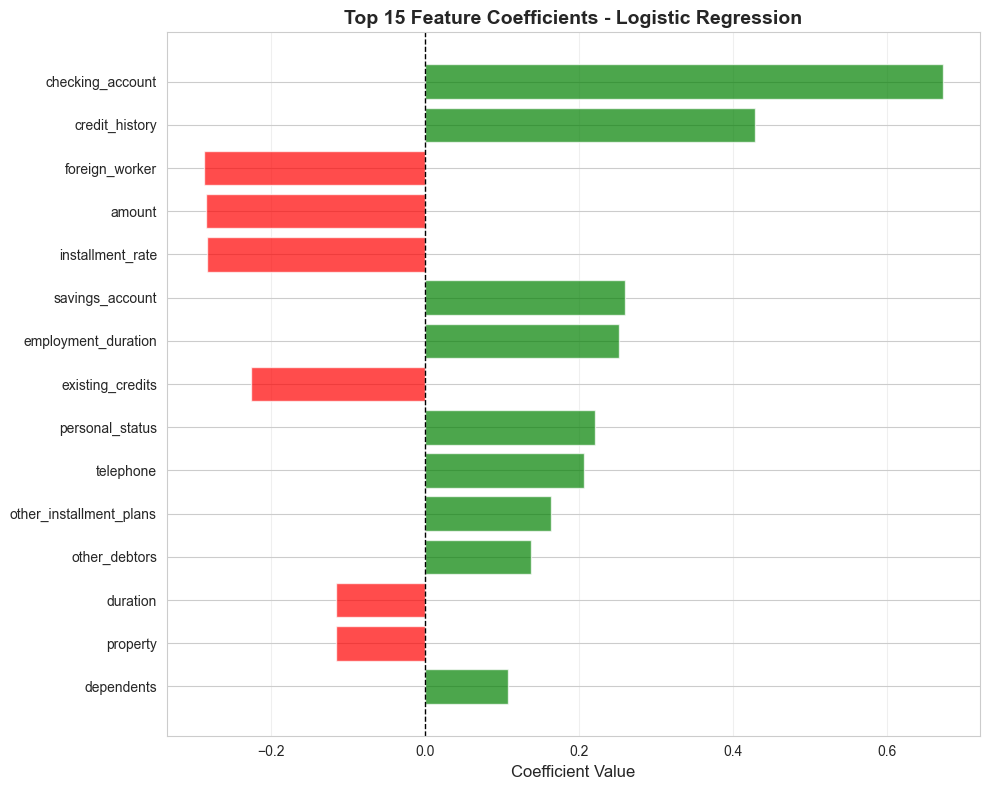


‚úì Feature coefficients saved to: reports/feature_coefficients.csv


In [32]:
print("\n[8.6] Feature Importance Analysis")

# Check model type for appropriate feature importance method
if hasattr(best_model, 'feature_importances_'):
    print(f"\n‚úì {best_model_name} supports feature importance (tree-based)")
    
    importances = best_model.feature_importances_
    feature_names = X_train.columns
    
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print("\n--- Top 15 Most Important Features ---")
    print(importance_df.head(15).to_string(index=False))
    
    # Visualize
    plt.figure(figsize=(10, 8))
    top_n = 15
    top_features = importance_df.head(top_n)
    
    plt.barh(range(len(top_features)), top_features['Importance'], color='steelblue', alpha=0.8)
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Importance', fontsize=12)
    plt.title(f'Top {top_n} Feature Importances - {best_model_name}', 
             fontweight='bold', fontsize=14)
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.savefig('reports/figures/feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    importance_df.to_csv('reports/feature_importance.csv', index=False)
    print("\n‚úì Feature importance saved to: reports/feature_importance.csv")

elif hasattr(best_model, 'coef_'):
    print(f"\n‚úì {best_model_name} is a linear model (coefficients available)")
    
    coefficients = best_model.coef_[0]
    feature_names = X_train.columns
    
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients,
        'Abs_Coefficient': np.abs(coefficients)
    }).sort_values('Abs_Coefficient', ascending=False)
    
    print("\n--- Top 15 Features by Absolute Coefficient ---")
    print(coef_df.head(15)[['Feature', 'Coefficient']].to_string(index=False))
    
    print("\n--- Interpretation ---")
    print("Positive coefficients increase probability of good credit")
    print("Negative coefficients decrease probability of good credit")
    
    # Visualize
    plt.figure(figsize=(10, 8))
    top_n = 15
    top_features = coef_df.head(top_n)
    
    colors = ['green' if x > 0 else 'red' for x in top_features['Coefficient']]
    plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors, alpha=0.7)
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Coefficient Value', fontsize=12)
    plt.title(f'Top {top_n} Feature Coefficients - {best_model_name}', 
             fontweight='bold', fontsize=14)
    plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.savefig('reports/figures/feature_coefficients.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    coef_df.to_csv('reports/feature_coefficients.csv', index=False)
    print("\n‚úì Feature coefficients saved to: reports/feature_coefficients.csv")
else:
    print(f"\n‚ö† {best_model_name} does not support feature importance extraction")

## 8.7) Model Persistence and Versioning

In [33]:
print("\n[8.7] Model Persistence and Versioning")

# Create models directory
Path('models').mkdir(exist_ok=True)

# Save best model
model_path = 'models/best_model.pkl'
joblib.dump(best_model, model_path)
print(f"\n‚úì Best model saved to: {model_path}")

# Save all trained models (for comparison)
for name, model in trained_models.items():
    safe_name = name.replace(' ', '_').lower()
    joblib.dump(model, f'models/{safe_name}.pkl')
print(f"‚úì All {len(trained_models)} models saved to: models/")

# Save comprehensive metadata
metadata = {
    'model_selection': {
        'selected_model': best_model_name,
        'selection_criteria': 'AUC-ROC > 0.75, then Interpretability > Performance',
        'models_evaluated': list(trained_models.keys()),
        'models_meeting_threshold': qualified_models['Model'].tolist() if len(qualified_models) > 0 else []
    },
    'model_details': {
        'model_type': type(best_model).__name__,
        'hyperparameters': best_model.get_params(),
        'training_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
    },
    'dataset_info': {
        'train_samples': int(len(X_train)),
        'test_samples': int(len(X_test)),
        'n_features': int(X_train.shape[1]),
        'class_distribution_train': {
            'class_0': int((y_train == 0).sum()),
            'class_1': int((y_train == 1).sum())
        }
    },
    'performance_metrics': {
        'cross_validation': {
            'auc_roc_mean': float(best_metrics['CV_AUC_mean']),
            'auc_roc_std': float(best_metrics['CV_AUC_std']),
            'n_folds': 5
        },
        'test_set': {
            'accuracy': float(best_metrics['Test_Accuracy']),
            'precision': float(best_metrics['Test_Precision']),
            'recall': float(best_metrics['Test_Recall']),
            'f1_score': float(best_metrics['Test_F1']),
            'auc_roc': float(best_metrics['Test_AUC_ROC']) if best_metrics['Test_AUC_ROC'] is not None else None
        },
        'confusion_matrix': {
            'true_negatives': int(tn),
            'false_positives': int(fp),
            'false_negatives': int(fn),
            'true_positives': int(tp)
        }
    },
    'ml_canvas_compliance': {
        'primary_metric': 'AUC-ROC',
        'threshold_met': bool(best_metrics['Test_AUC_ROC'] >= 0.75),
        'threshold_value': 0.75,
        'achieved_value': float(best_metrics['Test_AUC_ROC']),
        'validation_strategy': '5-fold stratified cross-validation',
        'hyperparameter_tuning': 'Grid Search (reduced space)',
        'priority': 'Interpretability > Performance'
    }
}

metadata_path = 'models/model_metadata.json'
with open(metadata_path, 'w') as f:
    json.dump(metadata, f, indent=2)
print(f"‚úì Model metadata saved to: {metadata_path}")

# Test loading
print("\n--- Testing Model Loading ---")
loaded_model = joblib.load(model_path)
test_predictions = loaded_model.predict(X_test.head(5))
print(f"‚úì Model loaded successfully")
print(f"  Sample predictions (first 5): {test_predictions.tolist()}")
print(f"  Actual labels (first 5):      {y_test.head(5).tolist()}")


[8.7] Model Persistence and Versioning

‚úì Best model saved to: models/best_model.pkl
‚úì All 3 models saved to: models/
‚úì Model metadata saved to: models/model_metadata.json

--- Testing Model Loading ---
‚úì Model loaded successfully
  Sample predictions (first 5): [1, 1, 1, 0, 0]
  Actual labels (first 5):      [1, 1, 1, 1, 0]
